In [1]:
import pandas as pd
from glob import glob

## 1. Importando un archivo
### Importar el archivo 2022-ene con las columnas Temp_Avg, RH_Avg, WSpeed_Avg, Rad_Avg, con un índice de estampa temporal

In [12]:
path = "../data/2022-ene-tmix_hora_L1.csv"
# pd.read_csv(path, encoding='unicode_escape')
df = pd.read_csv(path, skiprows=[0,1,2,3,4,5,7], 
            usecols=[0,1,2,3,8], index_col=0,
            parse_dates=True, encoding="ISO-8859-1")

In [14]:
# df.index

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 744 entries, 2022-01-01 00:00:00 to 2022-01-31 23:00:00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Temp_Avg    744 non-null    float64
 1   RH_Avg      744 non-null    float64
 2   WSpeed_Avg  744 non-null    float64
 3   Rad_Avg     744 non-null    float64
dtypes: float64(4)
memory usage: 29.1 KB


array([<Axes: xlabel='TIMESTAMP'>, <Axes: xlabel='TIMESTAMP'>,
       <Axes: xlabel='TIMESTAMP'>, <Axes: xlabel='TIMESTAMP'>],
      dtype=object)

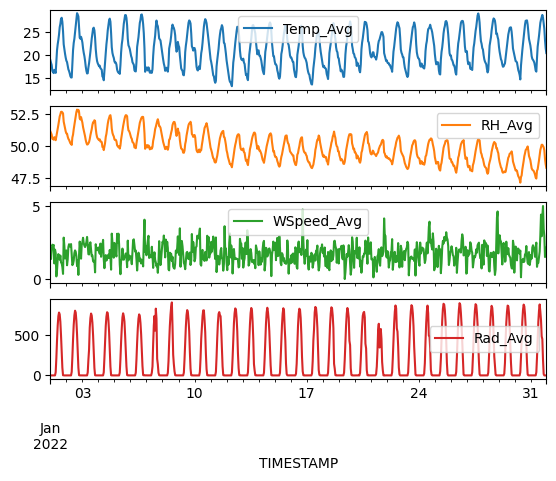

In [21]:
df.plot(subplots=True)

## 2. iloc, loc

<Axes: xlabel='TIMESTAMP'>

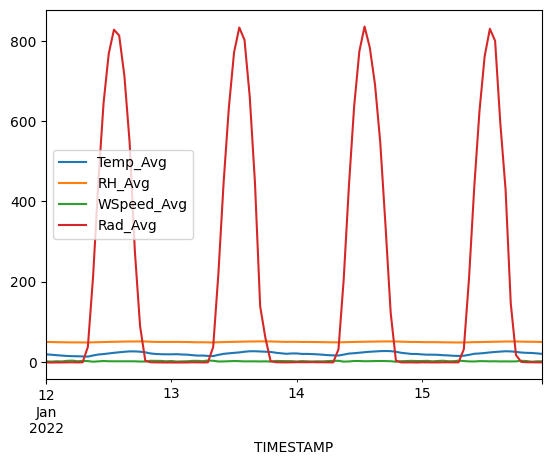

In [24]:
df.loc["2022-01-12":"2022-01-15"].plot()

<Axes: xlabel='TIMESTAMP'>

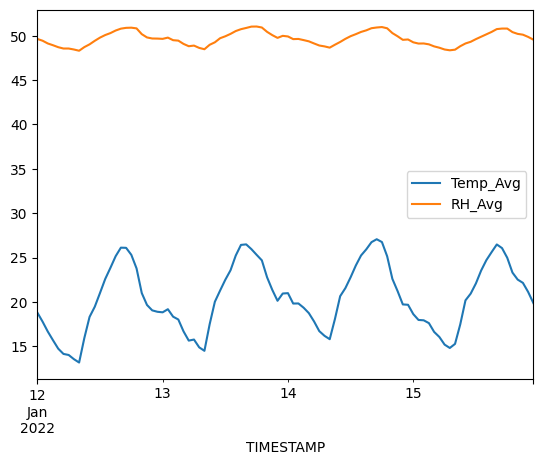

In [31]:
df.loc["2022-01-12":"2022-01-15",["Temp_Avg",'RH_Avg']].plot()

In [35]:
df.iloc[0::6]

,Temp_Avg,RH_Avg,WSpeed_Avg,Rad_Avg
TIMESTAMP,,,,
2022-01-01 00:00:00,18.84,51.14,1.940,-1.506
2022-01-01 06:00:00,16.73,50.68,1.082,-1.423
2022-01-01 12:00:00,23.26,51.64,1.721,731.815
2022-01-01 18:00:00,27.18,52.63,0.836,93.651
2022-01-02 00:00:00,18.72,50.97,1.973,-1.344
...,...,...,...,...
2022-01-30 18:00:00,27.51,49.81,1.587,155.664
2022-01-31 00:00:00,21.07,48.58,1.653,-1.325
2022-01-31 06:00:00,17.53,47.74,1.538,-1.357


In [36]:
df.iloc[0::6,["RH_Avg","Rad_Avg"]]

IndexError: .iloc requires numeric indexers, got ['RH_Avg' 'Rad_Avg']

In [39]:
df[0::6]

,Temp_Avg,RH_Avg,WSpeed_Avg,Rad_Avg
TIMESTAMP,,,,
2022-01-01 00:00:00,18.84,51.14,1.940,-1.506
2022-01-01 06:00:00,16.73,50.68,1.082,-1.423
2022-01-01 12:00:00,23.26,51.64,1.721,731.815
2022-01-01 18:00:00,27.18,52.63,0.836,93.651
2022-01-02 00:00:00,18.72,50.97,1.973,-1.344
...,...,...,...,...
2022-01-30 18:00:00,27.51,49.81,1.587,155.664
2022-01-31 00:00:00,21.07,48.58,1.653,-1.325
2022-01-31 06:00:00,17.53,47.74,1.538,-1.357


## 3. Importar dos archivos

In [41]:
path = "../data/2022-ene-tmix_hora_L1.csv"
# pd.read_csv(path, encoding='unicode_escape')
df_ene = pd.read_csv(path, skiprows=[0,1,2,3,4,5,7], 
            usecols=[0,1,2,3,8], index_col=0,
            parse_dates=True, encoding="ISO-8859-1")

In [42]:
path = "../data/2022-feb-tmix_hora_L1.csv"
# pd.read_csv(path, encoding='unicode_escape')
df_feb = pd.read_csv(path, skiprows=[0,1,2,3,4,5,7], 
            usecols=[0,1,2,3,8], index_col=0,
            parse_dates=True, encoding="ISO-8859-1")

In [43]:
df_feb

,Temp_Avg,RH_Avg,WSpeed_Avg,Rad_Avg
TIMESTAMP,,,,
2022-02-01 00:00:00,19.49,48.01,2.405,-1.462
2022-02-01 01:00:00,18.56,47.76,1.854,-1.525
2022-02-01 02:00:00,17.95,47.65,1.470,-1.681
2022-02-01 03:00:00,17.01,47.40,2.291,-1.411
2022-02-01 04:00:00,16.70,47.36,1.786,-1.491
...,...,...,...,...
2022-02-28 19:00:00,27.28,44.45,0.751,27.918
2022-02-28 20:00:00,24.97,44.00,1.932,-1.722
2022-02-28 21:00:00,22.84,43.48,2.436,-1.655


In [44]:
def read_ruoa(path):
    df = pd.read_csv(path, skiprows=[0,1,2,3,4,5,7], 
            usecols=[0,1,2,3,8], index_col=0,
            parse_dates=True, encoding="ISO-8859-1")
    return df

In [47]:
path = "../data/2022-ene-tmix_hora_L1.csv"
df_ene = read_ruoa(path)

In [48]:
path = "../data/2022-feb-tmix_hora_L1.csv"
df_feb = read_ruoa(path)

In [50]:
path = "../data/2022-mar-tmix_hora_L1.csv"
df_mar = read_ruoa(path)

In [51]:
df_mar

,Temp_Avg,RH_Avg,WSpeed_Avg,Rad_Avg
TIMESTAMP,,,,
2022-03-01 00:00:00,21.50,43.10,1.605,-1.636
2022-03-01 01:00:00,19.95,42.74,2.336,-1.808
2022-03-01 02:00:00,19.17,42.55,1.170,-1.762
2022-03-01 03:00:00,18.65,42.43,1.987,-1.608
2022-03-01 04:00:00,17.02,42.01,2.543,-1.381
...,...,...,...,...
2022-03-31 19:00:00,31.60,14.94,1.723,29.689
2022-03-31 20:00:00,29.38,18.03,1.199,-2.026
2022-03-31 21:00:00,26.78,20.40,1.316,-2.078


## 4. Concatenación

In [52]:
pd.concat([df_ene, df_feb])

,Temp_Avg,RH_Avg,WSpeed_Avg,Rad_Avg
TIMESTAMP,,,,
2022-01-01 00:00:00,18.84,51.14,1.940,-1.506
2022-01-01 01:00:00,18.26,51.02,1.384,-1.467
2022-01-01 02:00:00,17.78,50.88,1.971,-1.253
2022-01-01 03:00:00,16.50,50.55,2.367,-1.051
2022-01-01 04:00:00,16.28,50.54,2.281,-1.426
...,...,...,...,...
2022-02-28 19:00:00,27.28,44.45,0.751,27.918
2022-02-28 20:00:00,24.97,44.00,1.932,-1.722
2022-02-28 21:00:00,22.84,43.48,2.436,-1.655


In [53]:
pd.concat([df_ene, df_feb], axis=1)

,Temp_Avg,RH_Avg,WSpeed_Avg,Rad_Avg,Temp_Avg,RH_Avg,WSpeed_Avg,Rad_Avg
TIMESTAMP,,,,,,,,
2022-01-01 00:00:00,18.84,51.14,1.940,-1.506,NaN,NaN,NaN,NaN
2022-01-01 01:00:00,18.26,51.02,1.384,-1.467,NaN,NaN,NaN,NaN
2022-01-01 02:00:00,17.78,50.88,1.971,-1.253,NaN,NaN,NaN,NaN
2022-01-01 03:00:00,16.50,50.55,2.367,-1.051,NaN,NaN,NaN,NaN
2022-01-01 04:00:00,16.28,50.54,2.281,-1.426,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-02-28 19:00:00,NaN,NaN,NaN,NaN,27.28,44.45,0.751,27.918
2022-02-28 20:00:00,NaN,NaN,NaN,NaN,24.97,44.00,1.932,-1.722
2022-02-28 21:00:00,NaN,NaN,NaN,NaN,22.84,43.48,2.436,-1.655


In [56]:
pd.concat([df_ene, df_feb],axis=1, join="inner")

,Temp_Avg,RH_Avg,WSpeed_Avg,Rad_Avg,Temp_Avg,RH_Avg,WSpeed_Avg,Rad_Avg
TIMESTAMP,,,,,,,,


In [59]:
df_ene_mar = pd.concat([df_ene, df_feb, df_mar])

array([<Axes: xlabel='TIMESTAMP'>, <Axes: xlabel='TIMESTAMP'>,
       <Axes: xlabel='TIMESTAMP'>, <Axes: xlabel='TIMESTAMP'>],
      dtype=object)

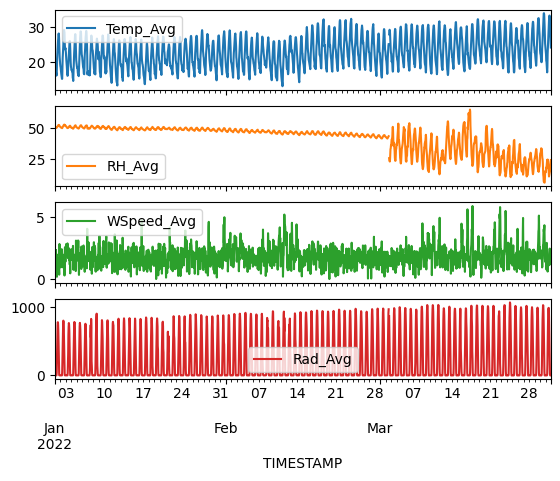

In [60]:
df_ene_mar.plot(subplots=True)

## 5. glob

In [61]:
from glob import glob

In [63]:
glob("./*")

['.\\007_fstrings.ipynb',
 '.\\008_funciones.ipynb',
 '.\\009_E002-Copy1.ipynb',
 '.\\009_E002.ipynb',
 '.\\prueba_funciones.py',
 '.\\Untitled.ipynb',
 '.\\__pycache__']

In [64]:
glob("./*.ipynb")

['.\\007_fstrings.ipynb',
 '.\\008_funciones.ipynb',
 '.\\009_E002-Copy1.ipynb',
 '.\\009_E002.ipynb',
 '.\\Untitled.ipynb']

In [69]:
glob("../data/Wind*")

['../data\\Wind_482@Y2023_M03_D10.CSV',
 '../data\\Wind_482@Y2023_M03_D11.CSV',
 '../data\\Wind_482@Y2023_M03_D12.CSV',
 '../data\\Wind_482@Y2023_M03_D13.CSV',
 '../data\\Wind_482@Y2023_M03_D14.CSV']

In [71]:
paths = glob("../data/2022*")

In [75]:
paths[10]

'../data\\2022-oct-tmix_hora_L1.csv'

In [73]:
read_ruoa(paths[10])

,Temp_Avg,RH_Avg,WSpeed_Avg,Rad_Avg
TIMESTAMP,,,,
2022-10-01 00:00:00,20.82,75.32,0.817,-0.619
2022-10-01 01:00:00,20.37,76.92,0.480,-0.993
2022-10-01 02:00:00,19.53,81.19,1.564,-0.805
2022-10-01 03:00:00,19.47,77.63,1.048,-0.733
2022-10-01 04:00:00,18.99,77.23,0.144,-1.271
...,...,...,...,...
2022-10-31 19:00:00,24.36,55.19,1.083,-0.490
2022-10-31 20:00:00,21.48,70.35,2.557,-0.919
2022-10-31 21:00:00,20.83,72.42,1.612,-1.290


In [76]:
paths

['../data\\2022-abr-tmix_hora_L1.csv',
 '../data\\2022-ago-tmix_hora_L1.csv',
 '../data\\2022-dic-tmix_hora_L1.csv',
 '../data\\2022-ene-tmix_hora_L1.csv',
 '../data\\2022-feb-tmix_hora_L1.csv',
 '../data\\2022-jul-tmix_hora_L1.csv',
 '../data\\2022-jun-tmix_hora_L1.csv',
 '../data\\2022-mar-tmix_hora_L1.csv',
 '../data\\2022-may-tmix_hora_L1.csv',
 '../data\\2022-nov-tmix_hora_L1.csv',
 '../data\\2022-oct-tmix_hora_L1.csv',
 '../data\\2022-sep-tmix_hora_L1.csv']

In [77]:
df = []
for file in paths:
    df.append(read_ruoa(file))

,Temp_Avg,RH_Avg,WSpeed_Avg,Rad_Avg
TIMESTAMP,,,,
2022-04-01 00:00:00,23.32,24.77,1.263,-2.356
2022-04-01 01:00:00,22.74,25.38,1.266,-1.895
2022-04-01 02:00:00,21.88,27.38,1.639,-1.693
2022-04-01 03:00:00,20.27,31.91,2.717,-1.588
2022-04-01 04:00:00,19.63,35.20,1.580,-1.826
...,...,...,...,...
2022-09-30 19:00:00,23.32,58.30,2.202,2.277
2022-09-30 20:00:00,21.80,68.30,2.976,-0.653
2022-09-30 21:00:00,21.27,71.10,1.003,-0.987


In [81]:
pd.concat(df)

,Temp_Avg,RH_Avg,WSpeed_Avg,Rad_Avg
TIMESTAMP,,,,
2022-04-01 00:00:00,23.32,24.77,1.263,-2.356
2022-04-01 01:00:00,22.74,25.38,1.266,-1.895
2022-04-01 02:00:00,21.88,27.38,1.639,-1.693
2022-04-01 03:00:00,20.27,31.91,2.717,-1.588
2022-04-01 04:00:00,19.63,35.20,1.580,-1.826
...,...,...,...,...
2022-09-30 19:00:00,23.32,58.30,2.202,2.277
2022-09-30 20:00:00,21.80,68.30,2.976,-0.653
2022-09-30 21:00:00,21.27,71.10,1.003,-0.987


In [82]:
365*24

8760

In [84]:
df = pd.concat([read_ruoa(file) for file in paths])
df

,Temp_Avg,RH_Avg,WSpeed_Avg,Rad_Avg
TIMESTAMP,,,,
2022-04-01 00:00:00,23.32,24.77,1.263,-2.356
2022-04-01 01:00:00,22.74,25.38,1.266,-1.895
2022-04-01 02:00:00,21.88,27.38,1.639,-1.693
2022-04-01 03:00:00,20.27,31.91,2.717,-1.588
2022-04-01 04:00:00,19.63,35.20,1.580,-1.826
...,...,...,...,...
2022-09-30 19:00:00,23.32,58.30,2.202,2.277
2022-09-30 20:00:00,21.80,68.30,2.976,-0.653
2022-09-30 21:00:00,21.27,71.10,1.003,-0.987


In [85]:
df["2022-03-12":"2022-05-15"]

KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

In [86]:
df.sort_index(inplace=True)

In [88]:
df["2022-03-12":"2022-05-15"]

,Temp_Avg,RH_Avg,WSpeed_Avg,Rad_Avg
TIMESTAMP,,,,
2022-03-12 00:00:00,22.54,24.40,2.106,-1.942
2022-03-12 01:00:00,21.66,25.72,2.590,-1.880
2022-03-12 02:00:00,21.18,24.39,1.976,-1.803
2022-03-12 03:00:00,20.18,25.65,2.402,-1.775
2022-03-12 04:00:00,18.77,28.81,1.632,-1.722
...,...,...,...,...
2022-05-15 19:00:00,29.98,33.15,4.488,53.900
2022-05-15 20:00:00,29.25,33.80,2.314,-0.900
2022-05-15 21:00:00,28.03,37.25,1.383,-1.700


In [89]:
df = pd.concat([read_ruoa(file) for file in paths]).sort_index()
df

,Temp_Avg,RH_Avg,WSpeed_Avg,Rad_Avg
TIMESTAMP,,,,
2022-01-01 00:00:00,18.84,51.14,1.940,-1.506
2022-01-01 01:00:00,18.26,51.02,1.384,-1.467
2022-01-01 02:00:00,17.78,50.88,1.971,-1.253
2022-01-01 03:00:00,16.50,50.55,2.367,-1.051
2022-01-01 04:00:00,16.28,50.54,2.281,-1.426
...,...,...,...,...
2022-12-31 19:00:00,23.76,39.46,1.174,1.180
2022-12-31 20:00:00,20.67,47.59,2.575,-0.842
2022-12-31 21:00:00,19.93,48.74,1.736,-1.512


## 6. Resumen para importar múltiples archivos
1. Observar y analizar el archivo (te le quedas viendo)
2. Importar un archivo de acuerdo a las necesidades
3. Definir una función para importar archivos con la misma estructura/archivos de la misma fuente
4. Utilizar **glob** para tener una lista con las rutas de todos los archivos
5. Iterar sobre la lista anterior y leer todos con los archivos con la función que definimos en el paso 3
6. Concatenar y ordenar

In [90]:
def read_ruoa(path):
    df = pd.read_csv(path, skiprows=[0,1,2,3,4,5,7], 
            usecols=[0,1,2,3,8], index_col=0,
            parse_dates=True, encoding="ISO-8859-1")
    return df

In [91]:
paths = glob("../data/2022*")
df = pd.concat([read_ruoa(file) for file in paths]).sort_index()
df

,Temp_Avg,RH_Avg,WSpeed_Avg,Rad_Avg
TIMESTAMP,,,,
2022-01-01 00:00:00,18.84,51.14,1.940,-1.506
2022-01-01 01:00:00,18.26,51.02,1.384,-1.467
2022-01-01 02:00:00,17.78,50.88,1.971,-1.253
2022-01-01 03:00:00,16.50,50.55,2.367,-1.051
2022-01-01 04:00:00,16.28,50.54,2.281,-1.426
...,...,...,...,...
2022-12-31 19:00:00,23.76,39.46,1.174,1.180
2022-12-31 20:00:00,20.67,47.59,2.575,-0.842
2022-12-31 21:00:00,19.93,48.74,1.736,-1.512
